# QuickBundles

https://dipy.org/documentation/1.2.0./examples_built/segment_quickbundles/#example-segment-quickbundles

Why QuickBundles:

- QuickBundles is a use for baseline comparison

- Considering using Quickbundle MDF as geometric distance metric

In [1]:
import numpy as np

from dipy.io.streamline import load_tractogram
from dipy.segment.clustering import QuickBundles
from dipy.viz import window, actor

import matplotlib.pyplot as plt

from IPython.display import Image

## Get Streamlines 

### <span style="color:red">NOTE: By default use pyAFQ tractogram</span>

#### Fornix

#### SLF

In [2]:
tg_fname = '/Users/bloomdt/AFQ_data/stanford_hardi/derivatives/afq/sub-01/ses-01/bundles/sub-01_ses-01_dwi_space-RASMM_model-DTI_desc-det-AFQ-SLF_L_tractography.trk'
tractogram = load_tractogram(tg_fname, 'same')# , bbox_valid_check=False)
streamlines = tractogram.streamlines


## Run QuickBundles

clustering using the MDF metric and a 10mm distance threshold

## <span style="color:red">NOTE: choice of threshold value is following from QB example.</span>

- There may be justification for this choice, but for current purposes can be treated as arbitrary

In [3]:
qb = QuickBundles(threshold=10.)
clusters = qb.cluster(streamlines)

### diagnostic information about the clustering result

In [4]:
print("Nb. clusters:", len(clusters))
print("Cluster sizes:", map(len, clusters))
print("Small clusters:", clusters < 10)
print("Streamlines indices of the first cluster:\n", clusters[0].indices)
print("Centroid of the last cluster:\n", clusters[-1].centroid)

Nb. clusters: 6
Cluster sizes: <map object at 0x7fcbed6d48b0>
Small clusters: [False False False False  True  True]
Streamlines indices of the first cluster:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 83, 84, 85, 86, 87, 88, 92, 93, 94, 102, 106, 107, 110, 111, 114, 115, 117, 130, 131, 132, 133, 134, 135, 147, 148, 151, 152, 153, 164, 165, 166, 167, 168, 190, 191, 193, 194, 195, 200, 203, 209, 210, 211, 236, 238, 239, 240, 241, 247, 251, 252, 254, 255, 256, 270, 272, 275, 276, 279, 282, 287, 288, 289, 303, 304, 306, 307, 308, 310, 311, 312, 314, 320, 324, 326, 327, 330, 331, 332, 344, 346, 347, 350, 353, 354, 356, 361, 363, 366, 367, 368, 369, 370, 371, 372, 374, 376, 385, 386, 388, 389, 392, 393, 395, 396, 397, 398, 400, 401, 403, 406]
Centroid of the last cluster:
 [[-52.239807 

### diagnostic plot first streamline from first cluster

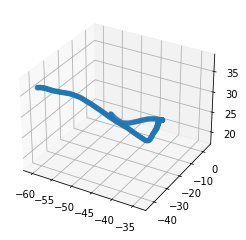

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*[(point[0],point[1],point[2]) for point in streamlines[clusters[0].indices[0]]]))
plt.show()

### show the bundle (colors from centroids)

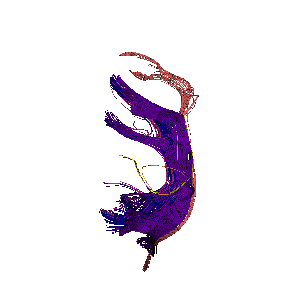

In [6]:
colormap_full = np.ones((len(streamlines), 3))
colormap = actor.create_colormap(np.arange(len(clusters)))

for cluster, color in zip(clusters, colormap):
    colormap_full[cluster.indices] = color

scene = window.Scene()
scene.SetBackground(1, 1, 1)
scene.add(actor.streamtube(streamlines, colormap_full))
window.record(scene, out_path='qb_clusters.png', size=(300, 300))
Image(filename='qb_clusters.png')